<a href="https://colab.research.google.com/github/akhilkumar-kondamidi/akhilkumar_data690/blob/main/Assignment_05/Assignment_05_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 05_part_3
- Name: Akhil Kumar Kondamidi

#What is Jupyter Notebook?

Jupyter Notebook is an open source web tool for creating and sharing documents with live code, equations, visualizations, and text. Project Jupyter is in charge of maintaining Jupyter Notebook.

#Part 1: Everything in a cell

Jupyter notebooks are organized as a set of "cells". Each cell can contain different types of content (markdown text, Python code, R code, etc.) The current  cell containing text is a markdown cell, cells with code are code cells, as displayed below.

In [4]:
6*3

18

**Command Mode**

- shift + enter run cell, select below
-ctrl + enter run cell
-option + enter run cell, insert -below
-A insert cell above
-B insert cell below
-C copy cell
-V paste cell
-D , D delete selected cell
-shift + M merge selected cells, or current cell with cell below if only one cell selected
-I , I interrupt kernel
-0 , 0 restart kernel (with dialog)
-Y change cell to code mode
-M change cell to markdown mode (good for documentation)

#Part 2: Working with code

In [5]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500,6), 0)

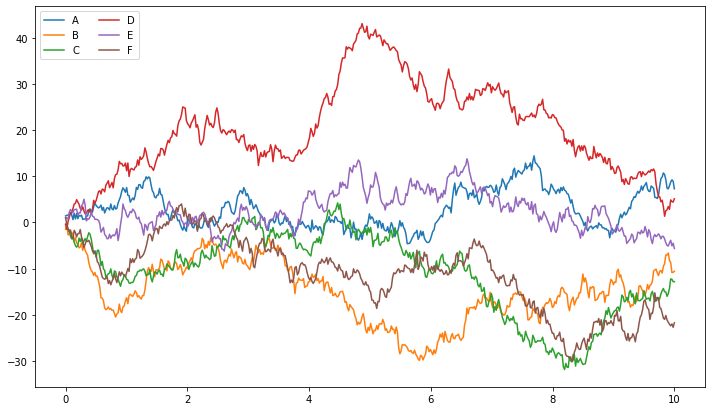

In [7]:
plt.figure(figsize=(12, 7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')
plt.show()

#Part 3: Interacting with data

In [8]:
import requests
import pandas as pd

In [9]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [10]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-02-26 20:12:46.609093')

In [11]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [12]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

#Bitcoin

In [13]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-26 21:00:00,39269.54,39466.84,39250.00,39352.48,7.636992,3.005067e+05
2022-02-26 22:00:00,39350.19,39681.18,39316.86,39466.34,104.197572,4.121826e+06
2022-02-26 23:00:00,39483.63,39495.45,39090.94,39182.98,26.926009,1.057289e+06
2022-02-27 00:00:00,39159.91,39183.18,38938.99,39146.66,38.993970,1.522280e+06
2022-02-27 01:00:00,39146.66,39285.02,38741.67,38836.10,45.843886,1.785093e+06


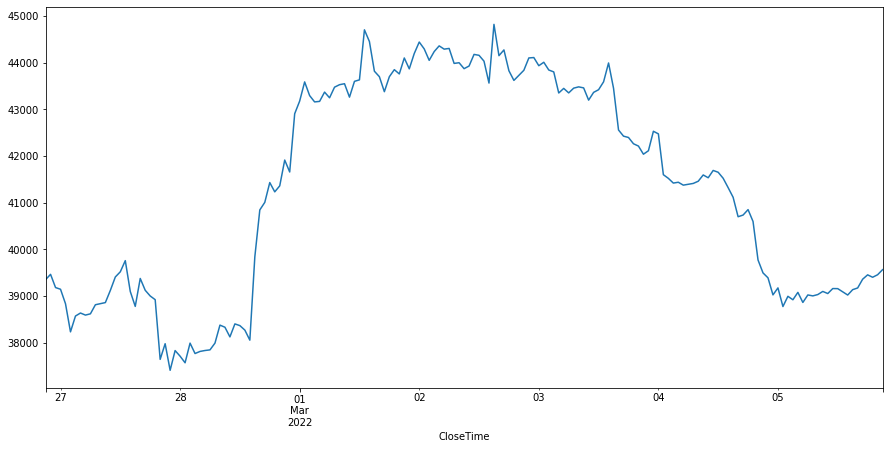

In [14]:
btc['ClosePrice'].plot(figsize=(15,7))
plt.show()

#Ether:

In [15]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-26 21:00:00,2813.20,2835.51,2811.20,2826.72,248.011215,7.003279e+05
2022-02-26 22:00:00,2826.52,2857.42,2821.99,2826.89,403.102143,1.145857e+06
2022-02-26 23:00:00,2828.03,2829.48,2789.42,2796.25,324.217400,9.113860e+05
2022-02-27 00:00:00,2795.61,2796.44,2767.79,2779.62,356.004032,9.899095e+05
2022-02-27 01:00:00,2779.16,2791.41,2743.57,2752.57,156.051381,4.306093e+05


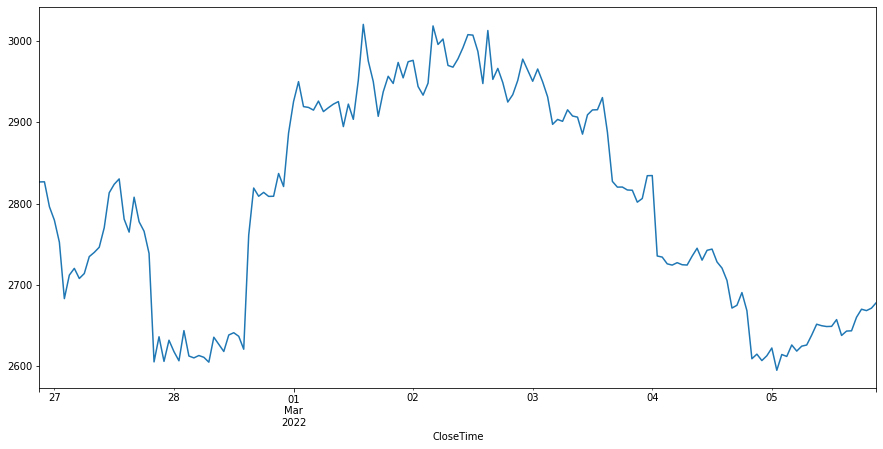

In [16]:
eth['ClosePrice'].plot(figsize=(15, 7))
plt.show()

In [17]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-02-26 21:00:00,2813.20,2835.51,2811.20,2826.72,248.011215,7.003279e+05
2022-02-26 22:00:00,2826.52,2857.42,2821.99,2826.89,403.102143,1.145857e+06
2022-02-26 23:00:00,2828.03,2829.48,2789.42,2796.25,324.217400,9.113860e+05
2022-02-27 00:00:00,2795.61,2796.44,2767.79,2779.62,356.004032,9.899095e+05
2022-02-27 01:00:00,2779.16,2791.41,2743.57,2752.57,156.051381,4.306093e+05


#Bonus: Dynamic plots with Bokeh

In [18]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [19]:
output_notebook()

In [20]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

#Part 4: Exporting to Excel

In [21]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [22]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [23]:
eth.to_excel(writer, sheet_name='Ether')

In [24]:
writer.save()